In [5]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Population Mean Glucose: 120.89
Sample Mean Glucose: 116.64
Population Max Glucose: 199
Sample Max Glucose: 183


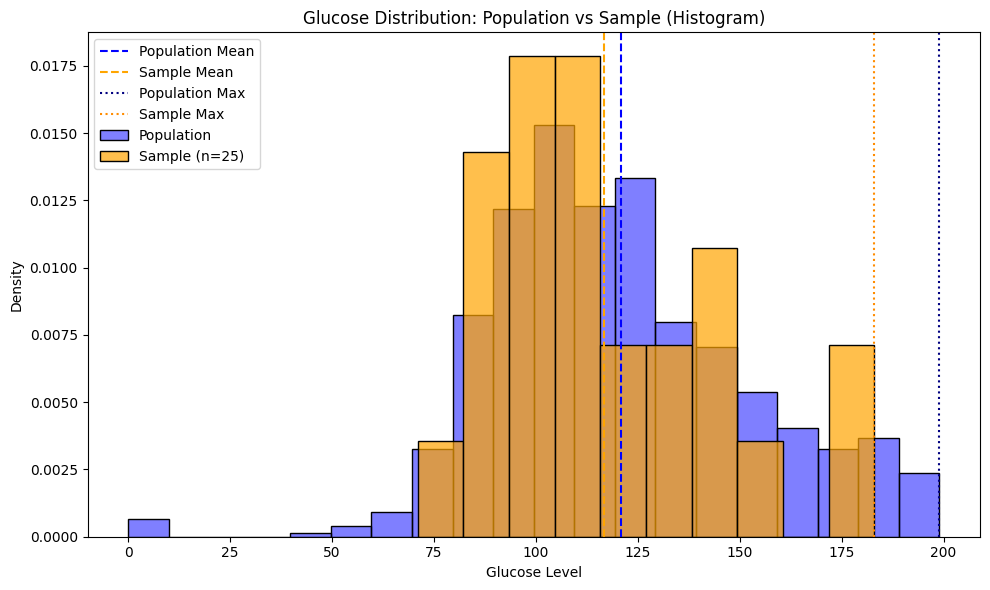

In [6]:
# Set seed and take random sample of 25
np.random.seed(42)
sample_df = df.sample(n=25)

# Calculate mean and max for population and sample
population_mean = df['Glucose'].mean()
population_max = df['Glucose'].max()
sample_mean = sample_df['Glucose'].mean()
sample_max = sample_df['Glucose'].max()

# Display statistics
print("Population Mean Glucose:", round(population_mean, 2))
print("Sample Mean Glucose:", round(sample_mean, 2))
print("Population Max Glucose:", population_max)
print("Sample Max Glucose:", sample_max)

# Histogram comparison
plt.figure(figsize=(10, 6))
sns.histplot(df['Glucose'], color='blue', label='Population', kde=False, stat='density', bins=20, alpha=0.5)
sns.histplot(sample_df['Glucose'], color='orange', label='Sample (n=25)', kde=False, stat='density', bins=10, alpha=0.7)

# Add vertical lines for means and max values
plt.axvline(population_mean, color='blue', linestyle='--', label='Population Mean')
plt.axvline(sample_mean, color='orange', linestyle='--', label='Sample Mean')
plt.axvline(population_max, color='navy', linestyle=':', label='Population Max')
plt.axvline(sample_max, color='darkorange', linestyle=':', label='Sample Max')

plt.title('Glucose Distribution: Population vs Sample (Histogram)')
plt.xlabel('Glucose Level')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

Population 98th Percentile BMI: 47.53
Sample 98th Percentile BMI: 40.25


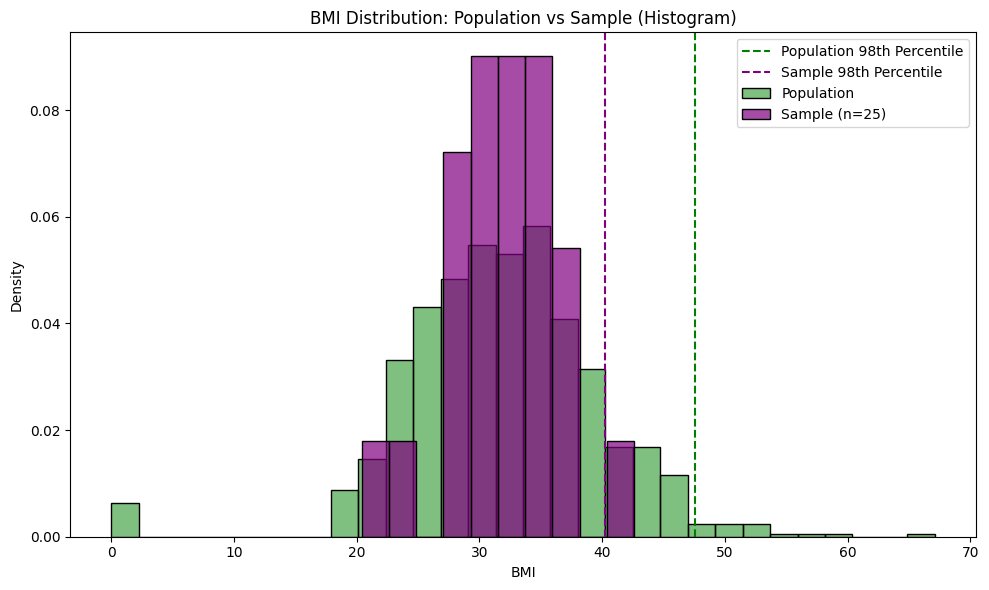

In [7]:
# Set seed and sample 25 observations
np.random.seed(42)
sample_df = df.sample(n=25)

# Compute 98th percentile of BMI
population_percentile_98 = np.percentile(df['BMI'], 98)
sample_percentile_98 = np.percentile(sample_df['BMI'], 98)

# Print values
print("Population 98th Percentile BMI:", round(population_percentile_98, 2))
print("Sample 98th Percentile BMI:", round(sample_percentile_98, 2))

# Histogram comparison
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], color='green', label='Population', bins=30, stat='density', alpha=0.5)
sns.histplot(sample_df['BMI'], color='purple', label='Sample (n=25)', bins=10, stat='density', alpha=0.7)

# Add vertical lines for 98th percentiles
plt.axvline(population_percentile_98, color='green', linestyle='--', label='Population 98th Percentile')
plt.axvline(sample_percentile_98, color='purple', linestyle='--', label='Sample 98th Percentile')

plt.title('BMI Distribution: Population vs Sample (Histogram)')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

Population Mean: 69.11
Bootstrap Mean: 69.18
Population Std Dev: 19.36
Bootstrap Std Dev: 19.07
Population 98th %ile: 99.32
Bootstrap 98th %ile: 97.9


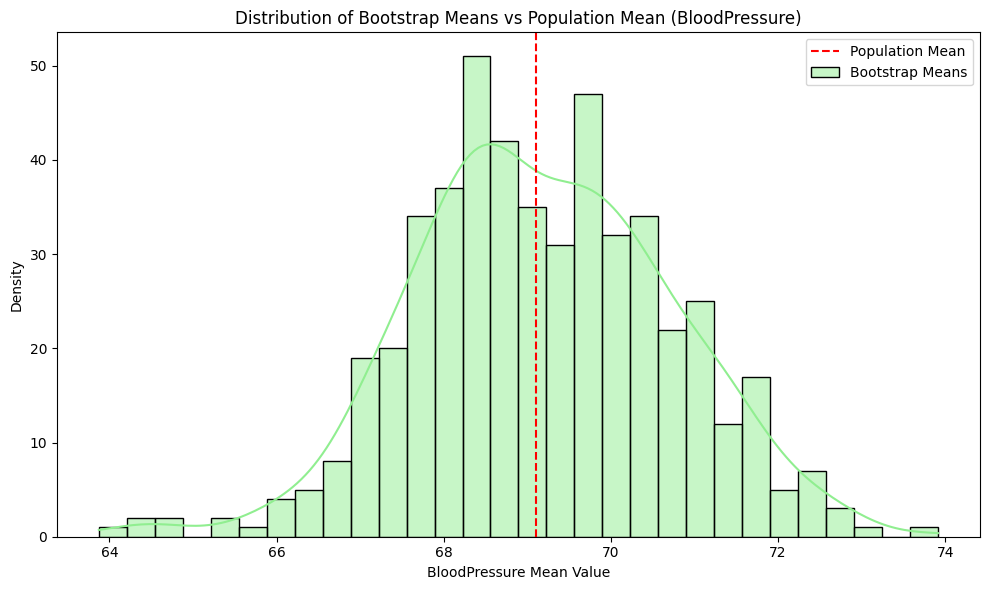

In [9]:
# Population statistics
pop_mean = df['BloodPressure'].mean()
pop_std = df['BloodPressure'].std()
pop_percentile = np.percentile(df['BloodPressure'], 98)

# Bootstrap
np.random.seed(42)
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

for _ in range(500):
    sample = df['BloodPressure'].sample(n=150, replace=True)
    bootstrap_means.append(sample.mean())
    bootstrap_stds.append(sample.std())
    bootstrap_percentiles.append(np.percentile(sample, 98))

# Compute average bootstrap stats
boot_mean = np.mean(bootstrap_means)
boot_std = np.mean(bootstrap_stds)
boot_percentile = np.mean(bootstrap_percentiles)

# Display
print("Population Mean:", round(pop_mean, 2))
print("Bootstrap Mean:", round(boot_mean, 2))
print("Population Std Dev:", round(pop_std, 2))
print("Bootstrap Std Dev:", round(boot_std, 2))
print("Population 98th %ile:", round(pop_percentile, 2))
print("Bootstrap 98th %ile:", round(boot_percentile, 2))

# Histogram plot for comparison of means
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means, color='lightgreen', bins=30, kde=True, label='Bootstrap Means')
plt.axvline(pop_mean, color='red', linestyle='--', label='Population Mean')
plt.title('Distribution of Bootstrap Means vs Population Mean (BloodPressure)')
plt.xlabel('BloodPressure Mean Value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


Population Mean: 69.11
Bootstrap Mean: 69.18
Population Std Dev: 19.36
Bootstrap Std Dev: 19.07
Population 98th Percentile: 99.32
Bootstrap 98th Percentile: 97.9


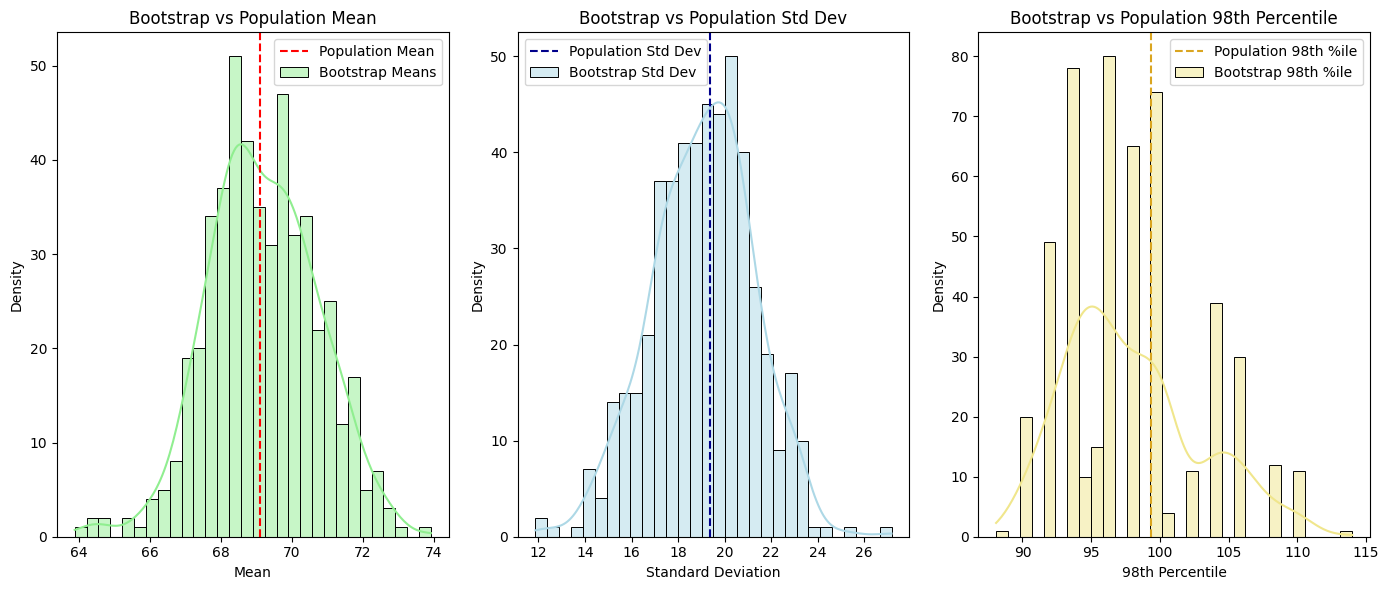

In [13]:
# Compute population statistics for BloodPressure
pop_mean = df['BloodPressure'].mean()
pop_std = df['BloodPressure'].std()
pop_percentile = np.percentile(df['BloodPressure'], 98)

# Bootstrap sampling
np.random.seed(42)
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

for _ in range(500):
    sample = df['BloodPressure'].sample(n=150, replace=True)
    bootstrap_means.append(sample.mean())
    bootstrap_stds.append(sample.std())
    bootstrap_percentiles.append(np.percentile(sample, 98))

# Compute average bootstrap statistics
boot_mean = np.mean(bootstrap_means)
boot_std = np.mean(bootstrap_stds)
boot_percentile = np.mean(bootstrap_percentiles)

# Print statistics
print("Population Mean:", round(pop_mean, 2))
print("Bootstrap Mean:", round(boot_mean, 2))
print("Population Std Dev:", round(pop_std, 2))
print("Bootstrap Std Dev:", round(boot_std, 2))
print("Population 98th Percentile:", round(pop_percentile, 2))
print("Bootstrap 98th Percentile:", round(boot_percentile, 2))

plt.figure(figsize=(14, 6))

# Histogram for Mean
plt.subplot(1, 3, 1)
sns.histplot(bootstrap_means, bins=30, color='lightgreen', kde=True, label='Bootstrap Means')
plt.axvline(pop_mean, color='red', linestyle='--', label='Population Mean')
plt.title('Bootstrap vs Population Mean')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()

# Histogram for Standard Deviation
plt.subplot(1, 3, 2)
sns.histplot(bootstrap_stds, bins=30, color='lightblue', kde=True, label='Bootstrap Std Dev')
plt.axvline(pop_std, color='darkblue', linestyle='--', label='Population Std Dev')
plt.title('Bootstrap vs Population Std Dev')
plt.xlabel('Standard Deviation')
plt.ylabel('Density')
plt.legend()

# Histogram for 98th Percentile
plt.subplot(1, 3, 3)
sns.histplot(bootstrap_percentiles, bins=30, color='khaki', kde=True, label='Bootstrap 98th %ile')
plt.axvline(pop_percentile, color='goldenrod', linestyle='--', label='Population 98th %ile')
plt.title('Bootstrap vs Population 98th Percentile')
plt.xlabel('98th Percentile')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


# Report
The prespecified bootstrap estimates of mean, standard deviation, and 98th percentile BloodPressure is well represented in the summary histogram. The comparison of the distributions and reference lines indicate that random sampling of bootstraps-based resampling works with high accuracy when approximating population level statistics.